In [2]:
from ServiceNowData import ServiceNowHTTPXClient

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [3]:
#client = ServiceNowHTTPXClient()
#response = client.healthCheck() # always run to make sure the instance is awake

In [4]:
# grab our major incident data
"""response = client.getData('incident','major_incident_state=accepted', {
    'sysparm_display_value':True,
    'sysparm_exclude_reference_link':True,
    'sysparm_fields':'number,resolved_by,short_description,description,priority,impact,urgency,closed_by,close_notes,state,category,major_incident_state'
    })"""

#data = response.json()['result']
#df = pd.DataFrame(data)
#df.head(5)

"response = client.getData('incident','major_incident_state=accepted', {\n    'sysparm_display_value':True,\n    'sysparm_exclude_reference_link':True,\n    'sysparm_fields':'number,resolved_by,short_description,description,priority,impact,urgency,closed_by,close_notes,state,category,major_incident_state'\n    })"

In [5]:
rate = 20 # average number of events per year
size = 20
# stable, shift, breakdown

z = np.random.exponential(1./rate, size=size)*365
print(f'mean: {np.mean(z)}')
print(f'max: {np.max(z)}')
print(f'min: {np.min(z)}')
print(f'std: {np.std(z)}')
df = pd.Timestamp('today').normalize() - pd.to_timedelta(24*60*60*np.cumsum(z), unit='s')
df

mean: 20.607872601050943
max: 44.269009925867756
min: 0.9844127848968678
std: 13.781241925832314


DatetimeIndex(['2023-04-23 16:28:23.263308978',
               '2023-04-22 16:50:49.998693889',
               '2023-03-27 14:57:20.561076584',
               '2023-02-14 10:25:32.140588544',
               '2023-01-30 15:06:56.117252020',
               '2023-01-26 06:54:18.172487080',
               '2022-12-31 03:41:12.444406282',
               '2022-11-27 22:15:13.936378457',
               '2022-11-22 12:10:44.120657962',
               '2022-11-04 15:34:39.734925367',
               '2022-09-21 09:07:17.277330391',
               '2022-09-18 15:44:58.271450352',
               '2022-08-25 03:30:49.778537903',
               '2022-08-07 15:14:13.386679742',
               '2022-08-04 16:22:30.148151856',
               '2022-07-20 11:16:28.317470234',
               '2022-06-07 05:20:25.854157791',
               '2022-06-01 04:17:00.875699405',
               '2022-05-05 07:23:27.033094026',
               '2022-04-11 20:13:16.145383969'],
              dtype='datetime64[ns]', f

<Axes: >

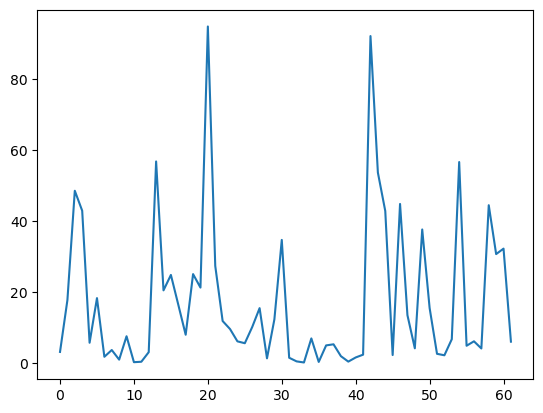

In [6]:
rates = [20,  5, 20, 80, 20]
sizes = [20,  2, 10, 10, 20]

from ServiceNowFaker import simulateArrivals
from datetime import datetime

arrivalDF = pd.DataFrame(simulateArrivals(rates, sizes))
arrivalDF = arrivalDF.rename(columns={0: "Opened"})
arrivalDF['Delta'] = -arrivalDF["Opened"].diff()
arrivalDF.loc[0,'Delta'] = datetime.today()-arrivalDF.iloc[0]['Opened'] # time difference from today

# reversing the data doesn't seem to change the chart.
display(((arrivalDF)['Delta'].astype('timedelta64[s]')/(24*60*60)).plot.line()) 

In [7]:
display(arrivalDF)

,Opened,Delta
0,2023-05-26 12:50:12.387036199,3 days 03:51:07.690126801
1,2023-05-08 18:29:30.587867636,17 days 18:20:41.799168563
2,2023-03-21 04:55:12.599160757,48 days 13:34:17.988706879
3,2023-02-06 06:25:47.672027530,42 days 22:29:24.927133227
4,2023-01-31 12:34:33.350447079,5 days 17:51:14.321580451
...,...,...
57,2020-09-28 13:44:01.084021315,4 days 03:10:04.962732077
58,2020-08-15 01:55:40.064124390,44 days 11:48:21.019896925
59,2020-07-15 08:32:54.408315286,30 days 17:22:45.655809104
60,2020-06-13 02:18:15.379564077,32 days 06:14:39.028751209


In [8]:
from ServiceNowFaker import generateMajorIncident

indexLength = len(arrivalDF.index)
for index, row in arrivalDF.iterrows():
    # "2017-09-15 22:41:36"
    print(generateMajorIncident(index, indexLength, row['Opened']))
    break


{'promoted_by': '', 'parent': '', 'caused_by': '', 'watch_list': '', 'upon_reject': 'cancel', 'sys_updated_on': '', 'origin_table': '', 'approval_history': '', 'number': 'INC0040063', 'proposed_by': '', 'lessons_learned': '', 'state': '6', 'sys_created_by': 'admin', 'knowledge': 'false', 'order': '', '__status': 'success', 'cmdb_ci': '3a726a31c0a8ce0100902bd28760693f', 'delivery_plan': '', 'contract': '', 'impact': '1', 'active': 'true', 'work_notes_list': '', 'priority': '1', 'sys_domain_path': '/', 'business_duration': '', 'group_list': '', 'approval_set': '', 'major_incident_state': 'accepted', 'universal_request': '', 'short_description': '', 'correlation_display': '', 'delivery_task': '', 'work_start': '', 'trigger_rule': '', 'additional_assignee_list': '', 'notify': '1', 'service_offering': '', 'sys_class_name': 'incident', 'closed_by': '', 'follow_up': '', 'parent_incident': '', 'reopened_by': '', 'reassignment_count': '1', 'assigned_to': '', 'sla_due': '', 'comments_and_work_no

32